In [2]:
%cd ..
from workflow.processing import *
from workflow.plotting import *

/home/anon/PycharmProjects/researchv2


In [4]:
experiment = Experiment(19, '/home/anon/generated_data/sacred')
df = experiment.record()
experiment 

vpril, humanoid, NC, no term. 100/20, lr scheduler, more critic bleed, clamp, just_one_q=false

In [5]:
experiment.config()

batch_size                                          256
bc_weight                                             0
burnin                                             8000
clamp_state_density                                0.01
context_smoothing                                     0
critic_bleed                                       0.98
critic_l2                                             0
critic_learning_rate                             0.0001
density_burnin                                     5000
density_factor                                        4
density_l2                                        1e-06
density_learning_rate                             2e-05
density_replay_size                              500000
density_smoothing                                   0.1
density_update_rate                                5000
discount_factor                                   0.995
exploration_noise                              -2.30259
min_replay_size                                 

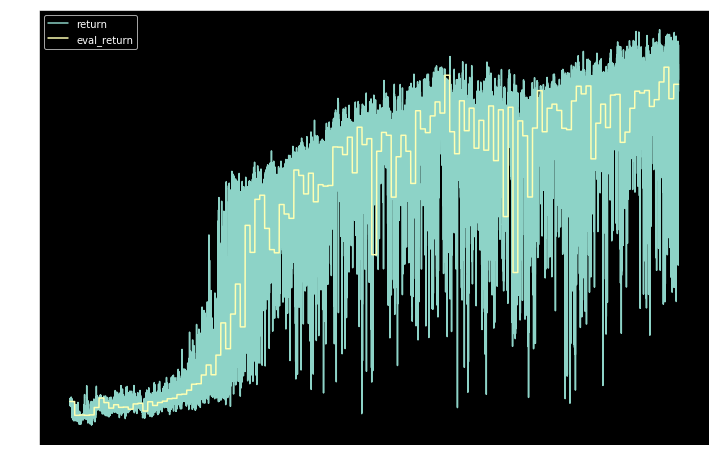

In [6]:
fig = plot_fields(df, ["return", 'eval_return'], x='iteration', preprocessors=[smoothen_fields(1)])
plt.grid(b=None)
ax = plt.gca()
#for x in range(0, df['iteration'].max(), experiment.config()['density_update_rate']):
 #   ax.axvline(x)#

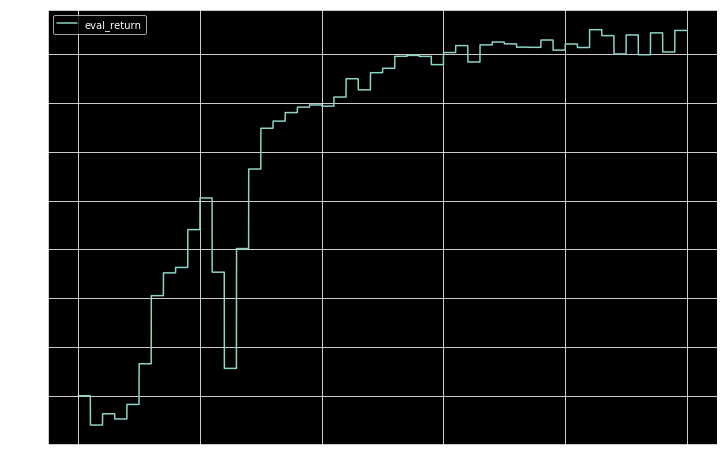

In [8]:
fig = plot_fields(df, ['eval_return'], x='iteration', preprocessors=[smoothen_fields(1)])


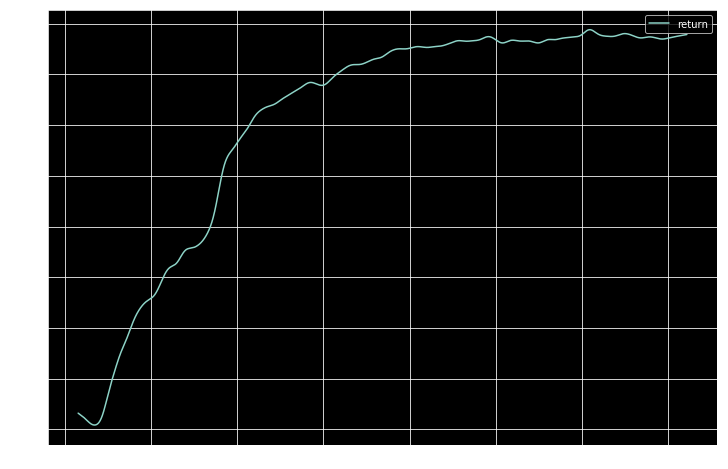

In [9]:
df_ = df.copy()
df_ = df_.dropna(subset=['return'])
fig = plot_fields(df_, ["return"], x='minute', preprocessors=[smoothen_fields(500)])

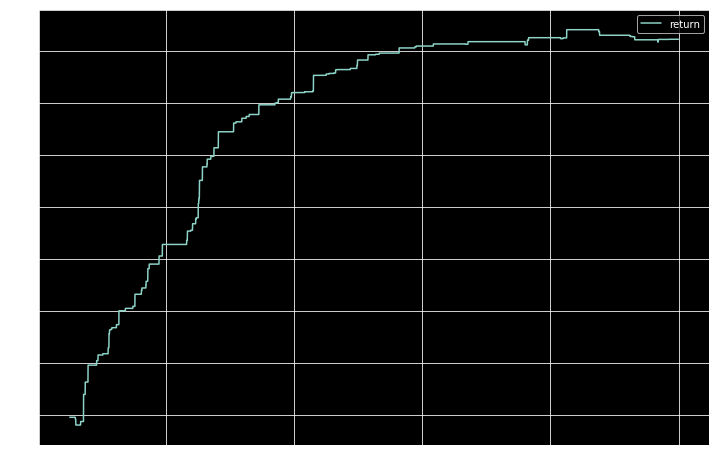

In [10]:
def _upper_range(df, fields, win_size=100):
    #df = df.dropna(subset=fields)[fields]
    df = df.fillna(method='ffill')[fields]
    df = df.rolling(win_size).max()
    return df.dropna()


def upper_range(win_size=100):
    return functools.partial(_upper_range, win_size=win_size)
fig = plot_fields(df_, ["return"], x='iteration', preprocessors=[upper_range(500), smoothen_fields(1)])

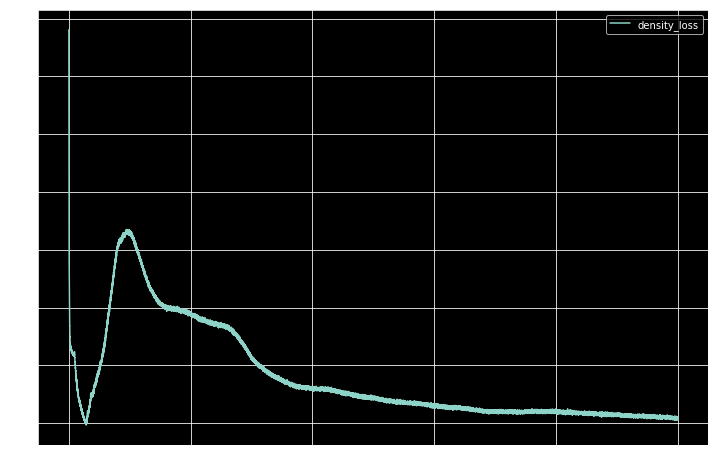

In [11]:
fig = plot_fields(df, ["density_loss"], x='iteration', preprocessors=[smoothen_fields(100)])

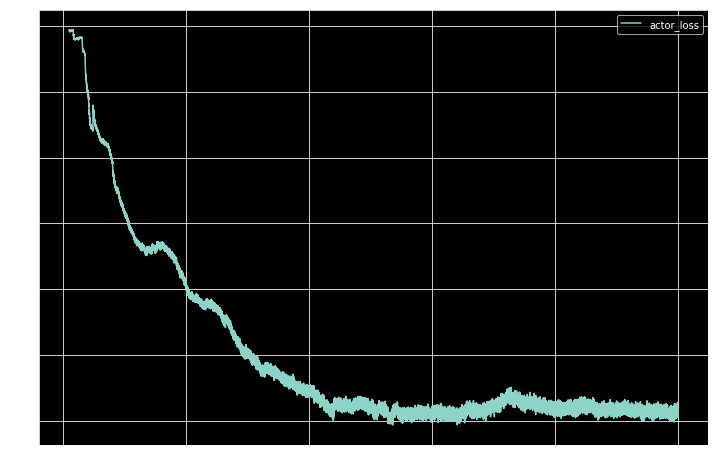

In [12]:
fig = plot_fields(df, ["actor_loss"], x='iteration', preprocessors=[smoothen_fields(100)])

###### fig = plot_fields(df, ["td_loss"], x='iteration', preprocessors=[smoothen_fields(100)])

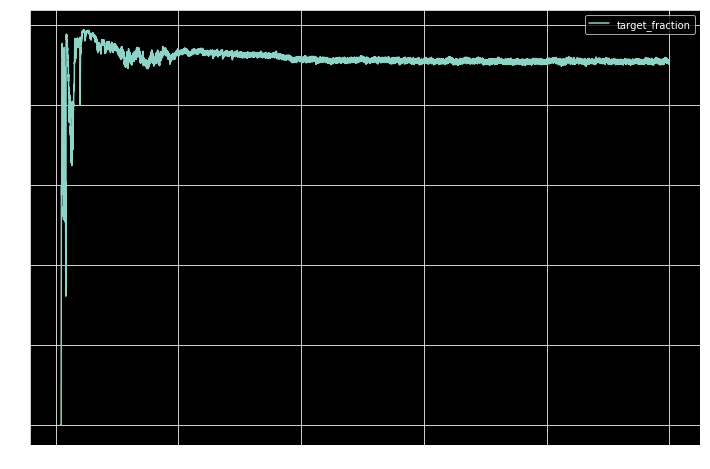

In [13]:
fig = plot_fields(df, ["target_fraction"], x='iteration', preprocessors=[smoothen_fields(100)])

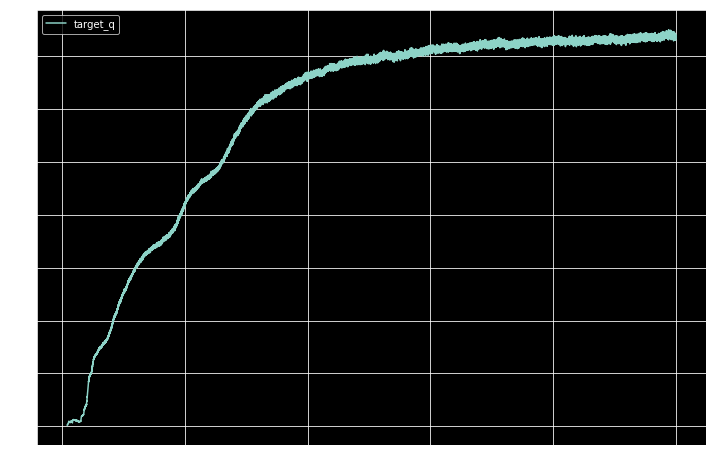

In [14]:
fig = plot_fields(df, ["target_q"], x='iteration', preprocessors=[smoothen_fields(100)])

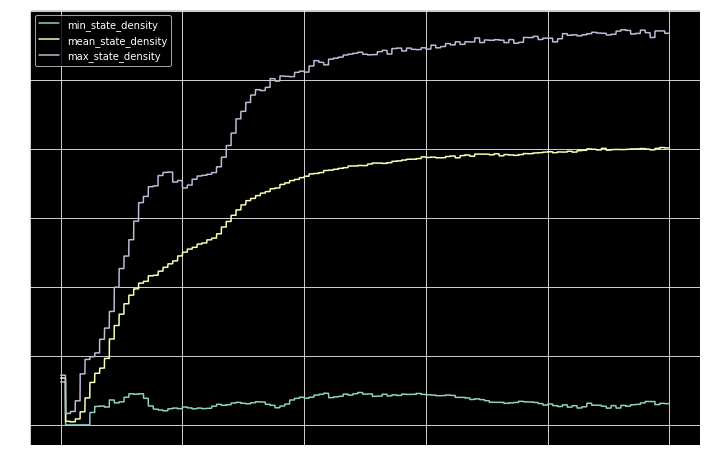

In [15]:
fig = plot_fields(df, ["min_state_density", "mean_state_density", "max_state_density"], x='iteration', preprocessors=[smoothen_fields(100)])

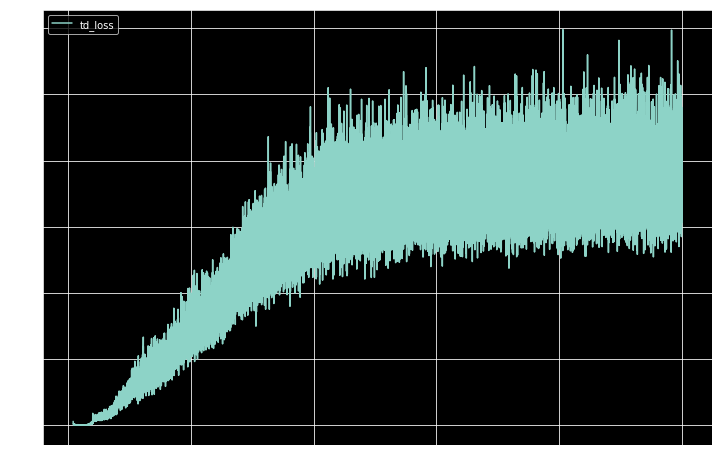

In [16]:
fig = plot_fields(df, ["td_loss"], x='iteration', preprocessors=[smoothen_fields(100)])

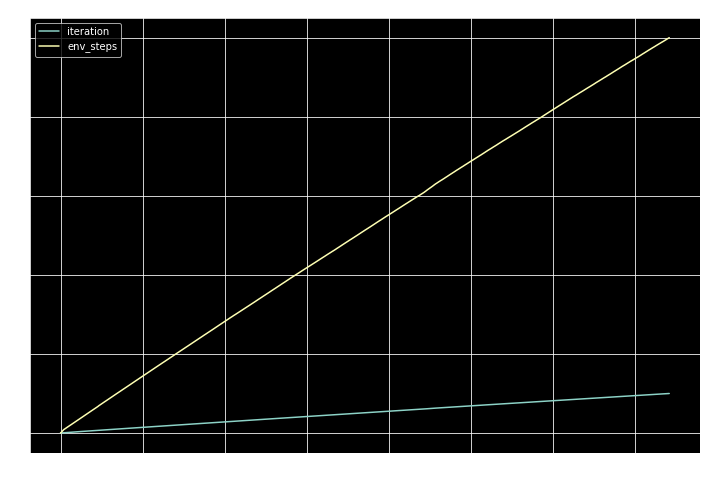

In [17]:
fig = plot_fields(df, ["iteration", 'env_steps'], x='minute', preprocessors=[smoothen_fields(1)])


### 